In [7]:
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation

In [2]:
ds = pd.read_csv('fashion-mnist_test.csv')
ds.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(ds)
x_data = data[:,1:]
y_data = data[:,0]
x_data=x_data/255.0


In [4]:
Y=np_utils.to_categorical(y_data)
Y.shape

(10000, 10)

In [6]:
x_train = x_data[:8000,:]
x_val = x_data[8000:,:]
y_train = Y[:8000]
y_val = Y[8000:]

## Building the Model with Keras

In [17]:
model = Sequential()
model.add(Dense(256,input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train,batch_size=256,epochs=50,verbose=2,validation_data=(x_val,y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 0s - loss: 2.0888 - acc: 0.2920 - val_loss: 1.8354 - val_acc: 0.5220
Epoch 2/50
 - 0s - loss: 1.6794 - acc: 0.5719 - val_loss: 1.5184 - val_acc: 0.6145
Epoch 3/50
 - 0s - loss: 1.4068 - acc: 0.6339 - val_loss: 1.3062 - val_acc: 0.6500
Epoch 4/50
 - 0s - loss: 1.2230 - acc: 0.6609 - val_loss: 1.1581 - val_acc: 0.6640
Epoch 5/50
 - 0s - loss: 1.0976 - acc: 0.6754 - val_loss: 1.0513 - val_acc: 0.6720
Epoch 6/50
 - 0s - loss: 1.0086 - acc: 0.6905 - val_loss: 0.9775 - val_acc: 0.6825
Epoch 7/50
 - 0s - loss: 0.9438 - acc: 0.7037 - val_loss: 0.9176 - val_acc: 0.6975
Epoch 8/50
 - 0s - loss: 0.8929 - acc: 0.7167 - val_loss: 0.8708 - val_acc: 0.7105
Epoch 9/50
 - 0s - loss: 0.8533 - acc: 0.7269 - val_loss: 0.8401 - val_acc: 0.7145
Epoch 10/50
 - 0s - loss: 0.8208 - acc: 0.7362 - val_loss: 0.8070 - val_acc: 0.7330
Epoch 11/50
 - 0s - loss: 0.7926 - acc: 0.7466 - val_loss: 0.7791 - val_acc: 0.7440
Epoch 12/50
 - 0s - loss: 0.7693 - ac

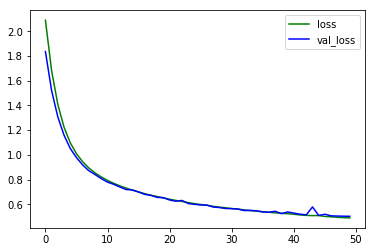

In [24]:
plt.plot(history.history['loss'],'g',label='loss')
plt.plot(history.history['val_loss'],'b',label='val_loss')
plt.legend()
plt.show()

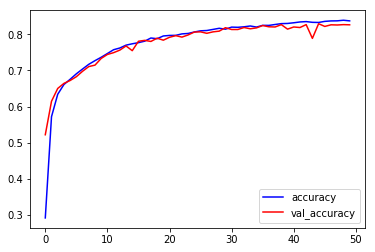

In [25]:
plt.plot(history.history['acc'],'b',label='accuracy')
plt.plot(history.history['val_acc'],'r',label='val_accuracy')
plt.legend()
plt.show()